## Teste Técnico Bemol - Assistente Administrativo
### Base de dados 2
Adham Lucas da Silva Oliveira


In [2]:
## Reservado para a importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#Leitura do dataset 2
dataset = pd.read_csv('/home/adham/projects/teste-tecnico-bemol/dataset/Desafio - Relatório - Ass de Projetos - Dados - Questão 2.csv')
dataset

,Loja,data_compra,inicio,termino,Loja.1,codloja,produto,EAN,quantidade,valor_total,Imposto
0,430,2019-07-05 10:30:41,2019-07-05,2019-07-20,Mercadinho Daskina,49618556000135,Açaí 1L,3298491451501,1,R$ 9.23,R$ 1.58
1,430,2019-07-05 11:58:18,2019-07-05,2019-07-20,Mercadinho Daskina,49618556000135,Açaí 1L,3298491451501,1,R$ 9.23,R$ 1.58
2,430,2019-07-05 14:06:58,2019-07-05,2019-07-20,Mercadinho Daskina,49618556000135,Açaí 1L,3298491451501,1,R$ 9.23,R$ 1.58
3,430,2019-07-05 14:50:06,2019-07-05,2019-07-20,Mercadinho Daskina,49618556000135,Açaí 1L,3298491451501,1,R$ 9.23,R$ 1.58
4,430,2019-07-05 16:04:56,2019-07-05,2019-07-20,Mercadinho Daskina,49618556000135,Açaí 1L,3298491451501,3,R$ 27.68,R$ 4.74
...,...,...,...,...,...,...,...,...,...,...,...
894,430,2019-07-02 9:40:35,2019-07-05,2019-07-20,Mercadinho Daskina,49618556000216,Açaí 1L,3298491451501,1,R$ 9.23,$0.00
895,430,2019-07-02 9:41:57,2019-07-05,2019-07-20,Mercadinho Daskina,49618556000216,Açaí 1L,3298491451501,1,R$ 9.23,$0.00
896,430,2019-07-02 9:39:47,2019-07-05,2019-07-20,Mercadinho Daskina,49618556000216,Açaí 1L,3298491451501,3,R$ 27.68,$0.00
897,430,2019-07-02 9:36:06,2019-07-05,2019-07-20,Mercadinho Daskina,49618556000216,Açaí 1L,3298491451501,1,R$ 9.23,$0.00


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Loja         899 non-null    int64 
 1   data_compra  899 non-null    object
 2   inicio       899 non-null    object
 3   termino      899 non-null    object
 4   Loja.1       899 non-null    object
 5   codloja      899 non-null    int64 
 6   produto      899 non-null    object
 7   EAN          899 non-null    int64 
 8   quantidade   899 non-null    int64 
 9   valor_total  899 non-null    object
 10  Imposto      899 non-null    object
dtypes: int64(4), object(7)
memory usage: 77.4+ KB


Verificando existência de atributos nulo

In [5]:
dataset.isnull().sum()

Loja           0
data_compra    0
inicio         0
termino        0
Loja.1         0
codloja        0
produto        0
EAN            0
quantidade     0
valor_total    0
Imposto        0
dtype: int64

**Removendo o 'R$' e ',' dos valores da coluna valor_compra para conversão no tipo float e para uso na análise**

In [6]:
dataset['valor_total'] = dataset['valor_total'].replace(to_replace ='R\$', value = '', regex = True)
dataset['valor_total'] = dataset['valor_total'].replace(to_replace =',', value = '', regex = True)
dataset = dataset.astype({'valor_total':'float64'})
dataset.dtypes

Loja             int64
data_compra     object
inicio          object
termino         object
Loja.1          object
codloja          int64
produto         object
EAN              int64
quantidade       int64
valor_total    float64
Imposto         object
dtype: object

** Normalizando a coluna de 'data_compra' para datetime sem o horário**

In [16]:
dataset['data_compra'] = pd.to_datetime(dataset['data_compra']).dt.normalize()
dataset.head(5)

,Loja,data_compra,inicio,termino,Loja.1,codloja,produto,EAN,quantidade,valor_total,Imposto
0,430,2019-07-05,2019-07-05,2019-07-20,Mercadinho Daskina,49618556000135,Açaí 1L,3298491451501,1,9.23,R$ 1.58
1,430,2019-07-05,2019-07-05,2019-07-20,Mercadinho Daskina,49618556000135,Açaí 1L,3298491451501,1,9.23,R$ 1.58
2,430,2019-07-05,2019-07-05,2019-07-20,Mercadinho Daskina,49618556000135,Açaí 1L,3298491451501,1,9.23,R$ 1.58
3,430,2019-07-05,2019-07-05,2019-07-20,Mercadinho Daskina,49618556000135,Açaí 1L,3298491451501,1,9.23,R$ 1.58
4,430,2019-07-05,2019-07-05,2019-07-20,Mercadinho Daskina,49618556000135,Açaí 1L,3298491451501,3,27.68,R$ 4.74


Verificar quantas lojas diferentes existem no dataset

In [7]:
dataset.groupby('Loja.1').size()

Loja.1
Mercadinho Daskina    899
dtype: int64

Verificando quais e quantos produtos diferentes existem no dataset

In [8]:
produtos_quantidade = dataset.groupby('produto').size()
produtos_quantidade

produto
Açaí 1L         612
Açaí 1L Zero    287
dtype: int64

### Valor total de vendas do Mercadinho Daskina

**R$ 10436.97**

In [9]:
dataset['valor_total'].sum()

10436.71

### Comparação de arrecadação total por produto

In [10]:
produtos = dataset['produto'].unique()

total_produto1 = dataset.groupby('produto').get_group(produtos[0])['valor_total'].sum()

total_produto2 = dataset.groupby('produto').get_group(produtos[1])['valor_total'].sum()

print('Total %s = R$%.2f' % (produtos[0], total_produto1))
print('Total %s = R$%.2f' % (produtos[1], total_produto2))

Total Açaí 1L = R$7260.93
Total Açaí 1L Zero = R$3175.78


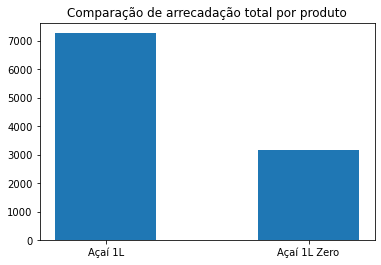

In [11]:
plt.title('Comparação de arrecadação total por produto')
plt.bar(produtos, [total_produto1, total_produto2], width=0.5)
plt.savefig('./images/comparacao-arrecadao-total-por-produto.png')  

### Porcentagem do valor total de venda de Açaí 1L em relação ao Açaí 1L Zero

**128.26%** maior

In [12]:
porcentagem_relacao_produto = ((total_produto1 - total_produto2) / total_produto2) * 100
porcentagem_relacao_produto

128.63454017595672

In [35]:
dataset = dataset.sort_values(['data_compra'])
test = dataset[dataset['data_compra'] == '2019-07-02']
test.groupby('produto').sum()

,Loja,codloja,EAN,quantidade,valor_total
produto,,,,,
Açaí 1L,89440,10320659648038796,686086221912208,291,2685.31
Açaí 1L Zero,13760,1587793792004320,252636822448544,39,359.92
